# Изучение закономерностей, определяющих успешность игр
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам необходимо выявить определяющие успешность игры закономерности.

Цели исследования: выявить определяющие успешность игр закономерности, определить портрет пользователя для каждого из регионов, проверить рабочие гипотезы. 

Данные записаны в файл games.csv. Данные включают в себя информацию за период с 1983 по 2016 годы. Данные за 2016 год могут быть неполными.

Описание данных games.csv:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Вывод

В нашем распоряжении таблица с 11 столбцами. Тип данных: float64, object.

Столбец `Year_of_Release` содержит целочисленные значения, однако они записаны в виде float. Столбцы с оценками критиков и пользователей, а также рейтингом игр содержит пропуски.

## Предобработка данных

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower()

In [8]:
#посчитаем пропуски
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропущенные значения в столбцах `name` и `genre` можно убрать, так как нам важно знать эти значения

Пропущенные значения в столбце `year_of_release` можно было бы заполнить данными о годе выпуска данной игры на другой платформе, однако производители игр могут выпускать свои продукты в разное время на разных платформах. Следовательно, уберем эти значения.

In [9]:
df = df.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

In [10]:
#изменим тип данных в столбце с годом выпуска игры
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [11]:
#подсчёт количества дубликатов
df.duplicated().sum()

0

In [12]:
#посчитаем пропуски
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [13]:
#взглянем на оценку пользователей
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.6       2
1.1       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Бросается в глаза значение `tbd`. TBD — сокращение от To Be Determined. Значит данных пока нет.

In [14]:
# производим замену 'tbd' на NaN, затем необходимо изменить тип данных в данном столбце
df = df.replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype('float')

Осталось довольно много пропусков значений в столбцах с оценками пользователей и критиков, а также с рейтингом. Заполнять эти пропуски средним нельзя, удалять тоже, так как, в первую очередь, нам интересно определить успешность игр, а это совокупность количества продаж и оценок.

In [15]:
#замена пропущенных значений в столбце 'rating' на строку 'unknown'
df['rating'] = df['rating'].fillna('unknown')

In [16]:
#посчитаем суммарные продажи для каждой игры
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод

При подготовке данных к анализу заменили названия столбцов, установили правильный тип данных во всех столбцах, заполнили пропуски, заменили значение tbd на NaN в столбце оценка пользователей,  посчитали суммарные продажи каждой игры во всех регионах.

## Исследовательский анализ данных

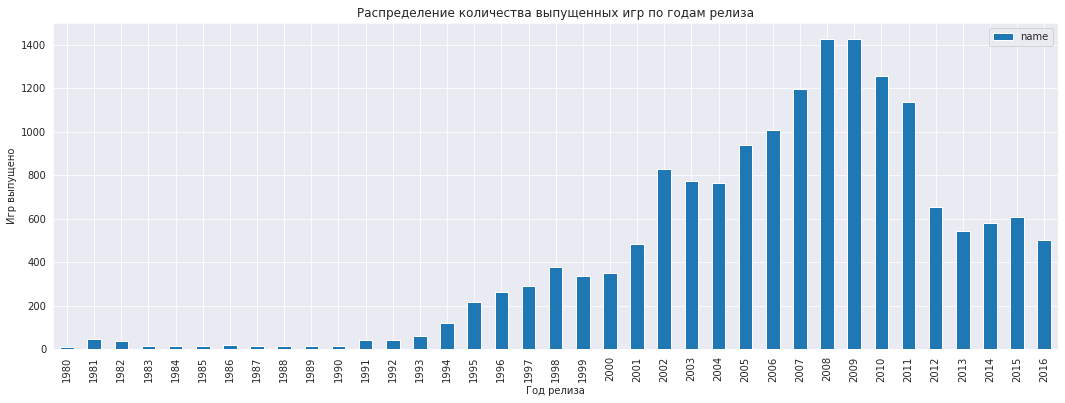

In [17]:
#посмотрим, сколько ежегодно выпускалось игр
df.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count').plot(kind='bar', figsize=(18, 6))
plt.title('Распределение количества выпущенных игр по годам релиза')
plt.ylabel('Игр выпущено')
plt.xlabel('Год релиза')
plt.show()

Как видим, рост в 2007-2011 годах сменился снижением количества выпущенных игр начиная с 2012 года. Для нашего исследования актуальным периодом можно назвать 2012-2016 годы - продажи в этот период примерно на одном уровне.

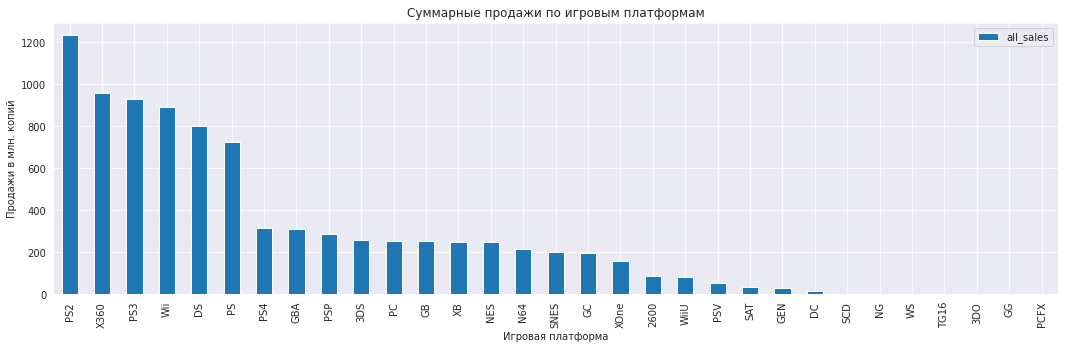

In [18]:
#посмотрим самые популярные платформы
df.pivot_table(index='platform', values = 'all_sales', aggfunc = 'sum').sort_values('all_sales', ascending=False).plot(kind='bar', figsize=(18, 5))
plt.title('Суммарные продажи по игровым платформам')
plt.ylabel('Продажи в млн. копий')
plt.xlabel('Игровая платформа')
plt.show()

Самые популярные платформы: DS, PS, PS2, PS3, Wii, X360

<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

В целом - да, если смотреть весь период.</div>

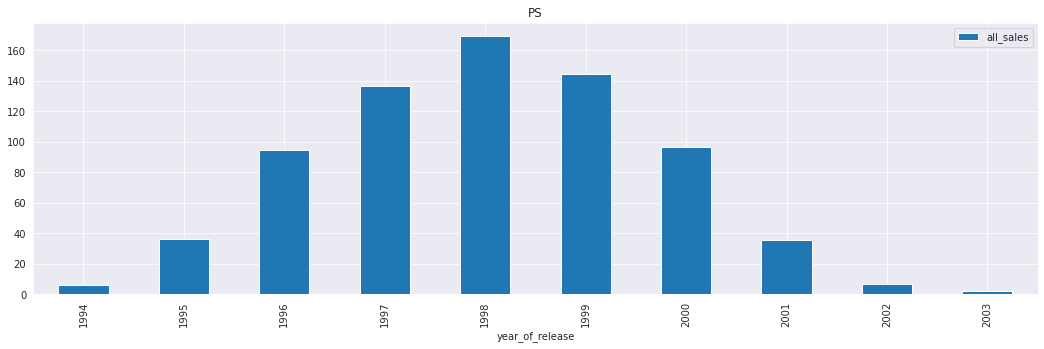

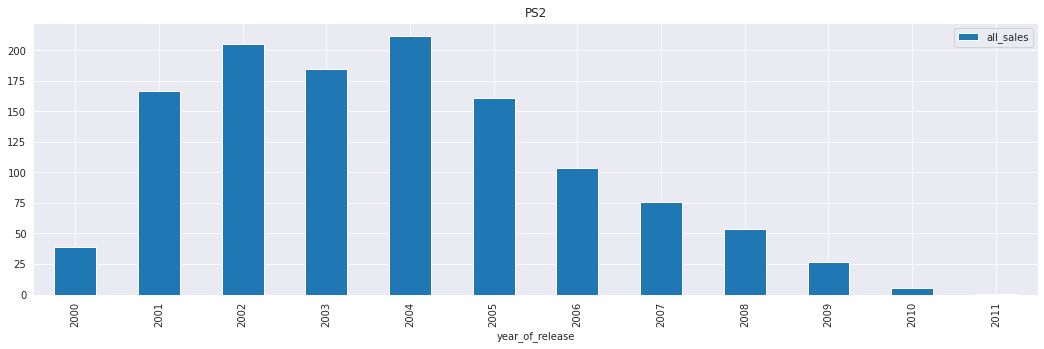

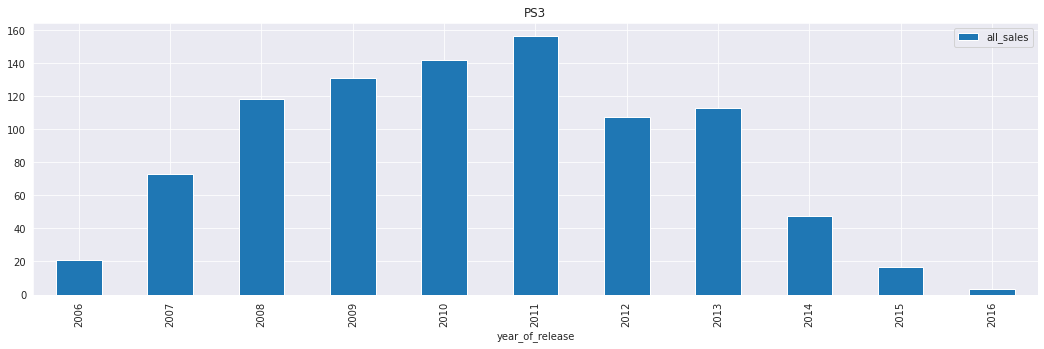

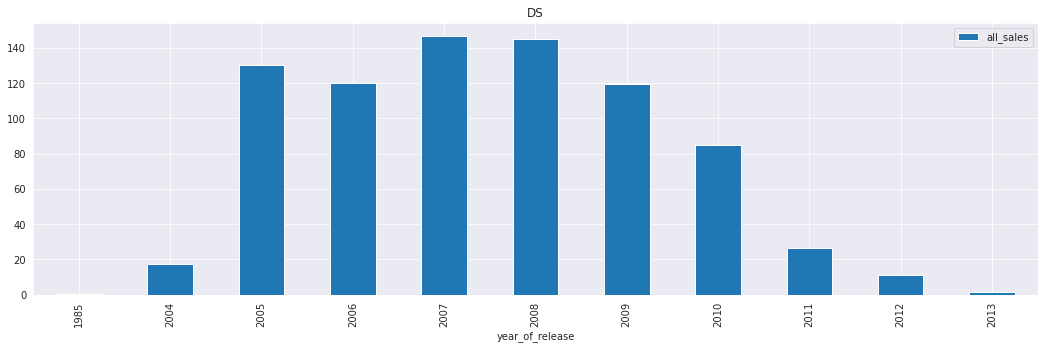

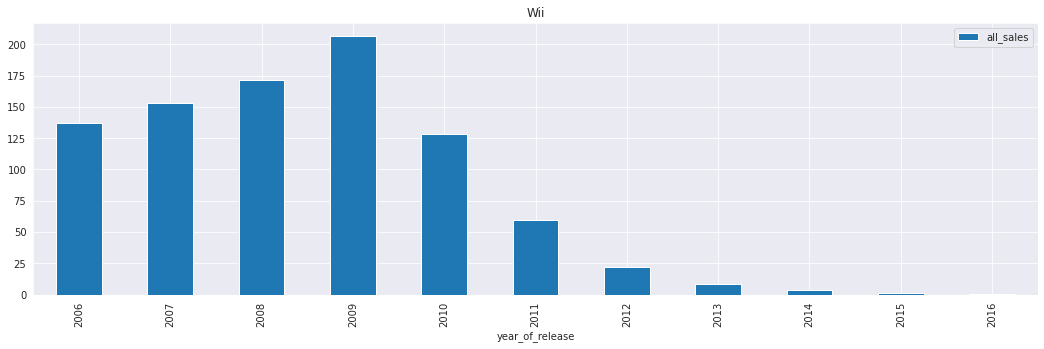

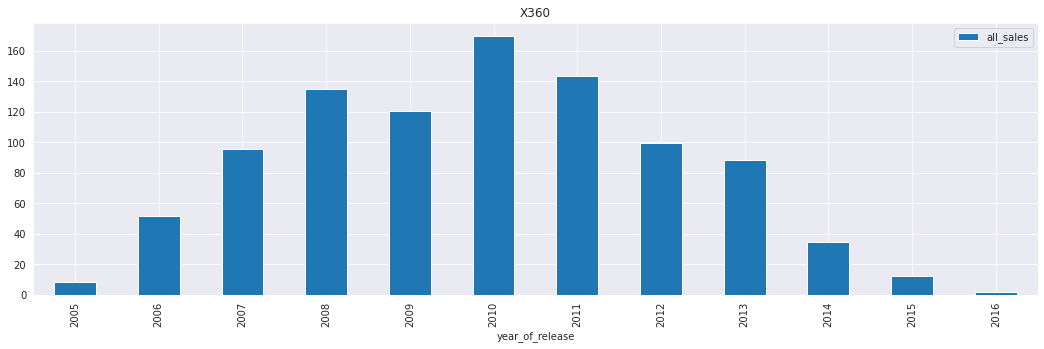

In [19]:
#посмотрим распределение продаж по популярным платформам по годам
top_platforms = ['PS', 'PS2', 'PS3','DS', 'Wii', 'X360']
for platform in top_platforms:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot(kind='bar', figsize=(18,5))
    plt.title(platform)

Срок жизни платформы около 10 лет, это видно на примере PlayStation. Пик популярности длится в течение 5 лет.

Text(0.5, 1.0, 'X360')

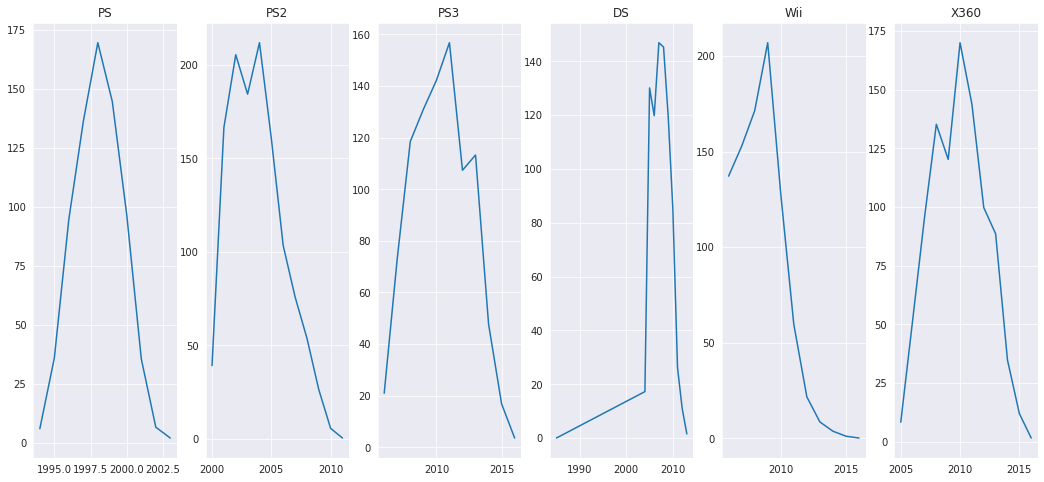

In [20]:
#посмотрим на пик популярности
fig, axs = plt.subplots(1,6, figsize=(18, 8))
top_platforms = ['PS', 'PS2', 'PS3','DS', 'Wii', 'X360']
axs[0].plot(df[df['platform'] == 'PS'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
axs[0].set_title('PS')
axs[1].plot(df[df['platform'] == 'PS2'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
axs[1].set_title('PS2')
axs[2].plot(df[df['platform'] == 'PS3'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
axs[2].set_title('PS3')
axs[3].plot(df[df['platform'] == 'DS'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
axs[3].set_title('DS')
axs[4].plot(df[df['platform'] == 'Wii'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
axs[4].set_title('Wii')
axs[5].plot(df[df['platform'] == 'X360'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
axs[5].set_title('X360')

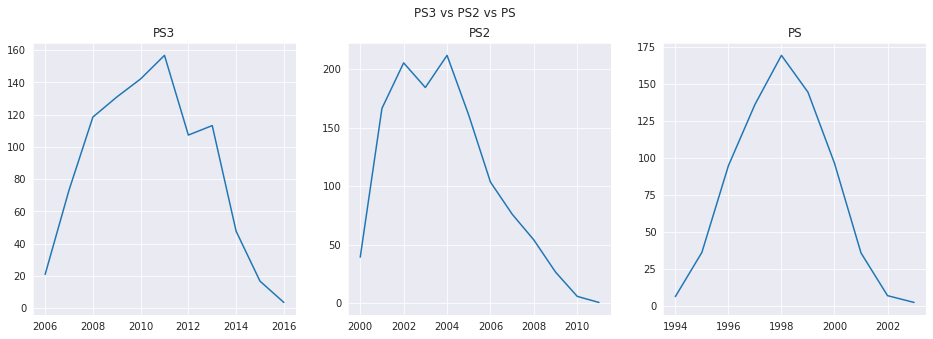

In [21]:
#сравнение одной платформы
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('PS3 vs PS2 vs PS')

ax1.plot(df[df['platform'] == 'PS3'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
ax1.set_title('PS3')
ax2.plot(df[df['platform'] == 'PS2'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
ax2.set_title('PS2')
ax3.plot(df[df['platform'] == 'PS'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum'))
ax3.set_title('PS')
plt.show()

In [23]:
#ранее определились с актуальным периодом - 2012-2016 годы
#запишем его в отдельный датафрейм
df_actual = df.query('2012 <= year_of_release <= 2016').reset_index(drop=True)
df_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


<AxesSubplot:xlabel='platform'>

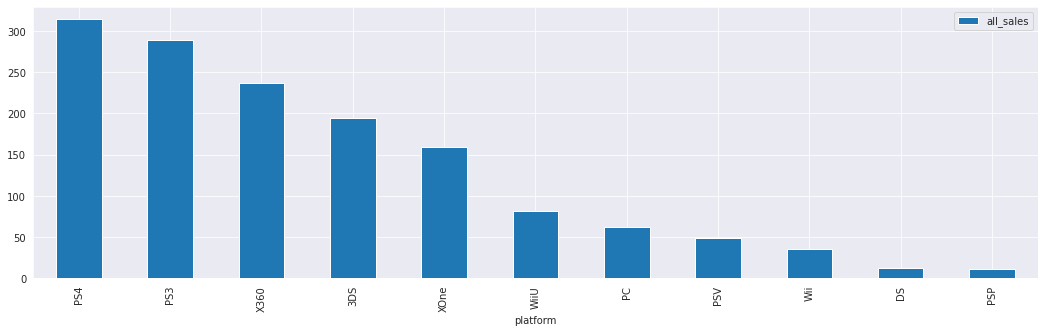

In [24]:
#посмотрим лидеров по продажам за этот период
df_actual.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).plot(kind='bar', figsize=(18, 5))

В числе лидеров актуальная PS4 и ее предыдущее поколение. Платформа X360 опережает более современное поколение XOne, однако с учетом срока популярности платформ, в 2017 году продажи игр для X360 будут низкими. 3DS пришла на замену DS в 2011 году. Wii уступила место более современной WiiU. Платформа PC не обновляется. PSV - новое поколение PSP, чей цикл подошел к концу.

Потенциально прибыльные платформы: PS4, XOne, 3DS, WiiU, PC, PSV.

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

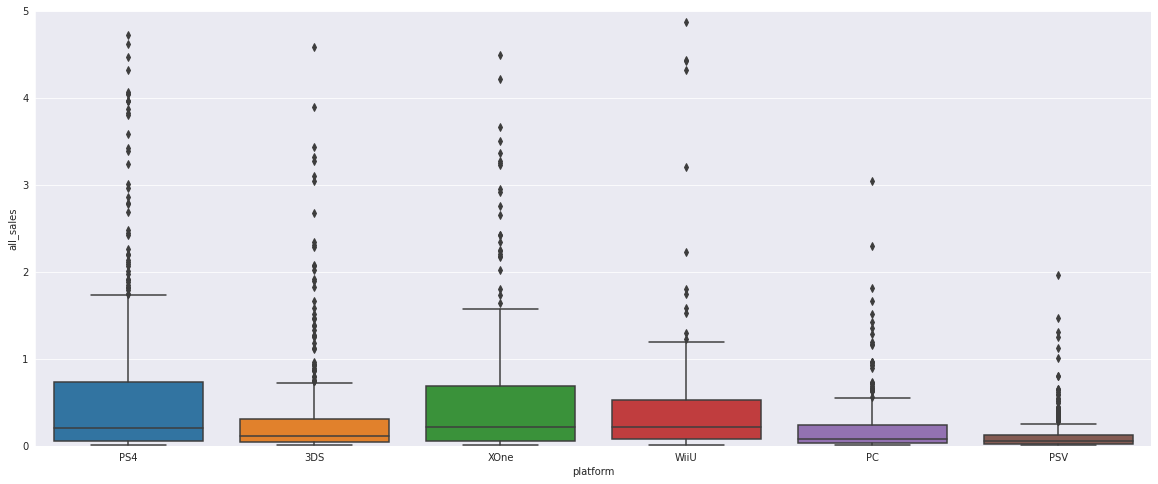

In [25]:
#построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
profitable = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']
df_actual_profitable = df_actual.query('platform in @profitable').reset_index(drop=True)
plt.figure(figsize=(20,8))
plt.ylim([0,5])
sns.boxplot(x='platform', y='all_sales', data=df_actual_profitable)

В среднем суммарные продажи игр находятся примерно на одном уровне. Выделяются несколько десятков игр, которые являются мировыми бестселлерами. Причем такие выбросы характерны почти для каждой платформы.

Медианы совокупных продаж игр на потенциально прибыльных платформах находятся в районе 0.2-0.3млн. Межквартильный размах PS4 и XOne выделяется на общем фоне, так как на данных платформах выпускается больше игр. Выделяются несколько десятков игр, которые являются мировыми бестселлерами. Причем такие выбросы характерны почти для каждой платформы.

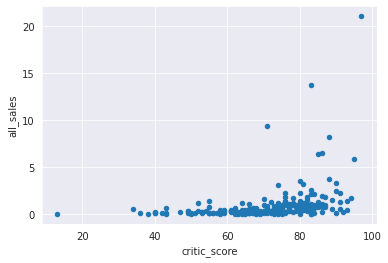

In [26]:
#посмотрим, как влияют на продажи игр для платформы PS3 отзывы критиков
df_actual.query('platform == "PS3"').plot(kind='scatter', x='critic_score', y='all_sales')
plt.show()

In [27]:
#взглянем на коэффициент корреляции глобальных продаж и оценки критиков
df_actual.query('platform == "PS3"')['critic_score'].corr(df_actual.query('platform == "PS3"')['all_sales'])

0.3314972592629587

Как видим, зависимость очень слабая. Интересен тот факт, что самая продаваемая игра оказалась лучшей по мнению критиков.

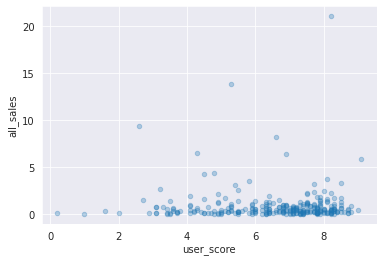

In [28]:
#посмотрим, как влияют на продажи игр для платформы PS3 отзывы пользователей
df_actual.query('platform == "PS3"').plot(kind='scatter', x='user_score', y='all_sales', alpha=0.3)
plt.show()

In [29]:
#взглянем на коэффициент корреляции глобальных продаж и оценки пользователей
df_actual.query('platform == "PS3"')['user_score'].corr(df_actual.query('platform == "PS3"')['all_sales'])

-0.005143522887113815

Как видим, зависимости нет. Бросается в глаза игра с суммарными продажами около 10 млн копий, при этом пользователи оценили ее не выше трех баллов.

При увеличении оценок критиков наблюдается увеличение суммы продаж, а оценка пользователей на суммарные продажи не влияет

In [30]:
#посмотрим наличие зависимости отзывов критиков на продажи на других платформах
platforms = df_actual['platform'].unique()
for platform in platforms:
    plat = df_actual.query('platform==@platform')
    print(platform,'коэффициент корреляции:',plat['critic_score'].corr(plat['all_sales']))

PS3 коэффициент корреляции: 0.3314972592629587
X360 коэффициент корреляции: 0.3605734888507336
PS4 коэффициент корреляции: 0.40656790206178095
3DS коэффициент корреляции: 0.3208028695360785
DS коэффициент корреляции: nan
XOne коэффициент корреляции: 0.4169983280084017
WiiU коэффициент корреляции: 0.34837976012017485
Wii коэффициент корреляции: -0.4243413011077494
PC коэффициент корреляции: 0.23724324311567915
PSV коэффициент корреляции: 0.0944878992931617
PSP коэффициент корреляции: nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


У большинства платформ мы видим несильную зависимость между оценкой критиков и суммарными продажами.

In [31]:
#посмотрим наличие зависимости отзывов пользователей на продажи на других платформах
platforms = df_actual['platform'].unique()
for platform in platforms:
    plat = df_actual.query('platform==@platform')
    print(platform,'коэффициент корреляции:',plat['user_score'].corr(plat['all_sales']))

PS3 коэффициент корреляции: -0.005143522887113815
X360 коэффициент корреляции: 0.006163978646213326
PS4 коэффициент корреляции: -0.031957110204556424
3DS коэффициент корреляции: 0.19758263411038599
DS коэффициент корреляции: 0.88270872757644
XOne коэффициент корреляции: -0.06892505328279414
WiiU коэффициент корреляции: 0.4002190202148617
Wii коэффициент корреляции: 0.29619680007479526
PC коэффициент корреляции: -0.12186747630735577
PSV коэффициент корреляции: -0.004339437514314869
PSP коэффициент корреляции: -0.802302061939321


Выделяются платформа DS и PSP с сильной прямой и обратной зависомостью. Продажи остальных игр почти не связаны с отзывами пользователей.

Можно предположить, что покупатели прислушиваются к мнению критиков и покупают рекомендуемые ими игры

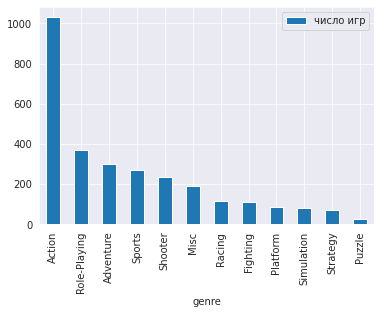

In [32]:
#посмотрим на общее распределение игр по жанрам
df_actual.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', label='число игр', legend=True)
plt.show()

Самым популярным жанром является Action.

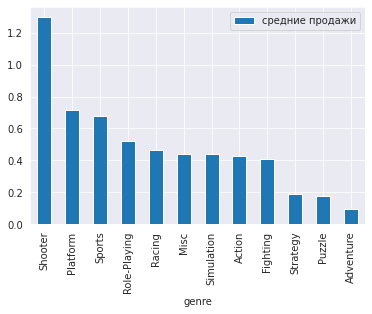

In [33]:
#посмотрим на распределение игр разных жанров по средним продажам
df_actual.groupby('genre')['all_sales'].mean().sort_values(ascending=False).plot(kind='bar', label='средние продажи', legend=True)
plt.show()

Средние продажи жанра Shooter говорят об успешности игр данного жанра. Несмотря на то что игры жанра Action выпускаются в большом объеме, средние продажи игр этого жанра довольно низкие. Также можно отметить жанр Adventure: по количеству игр этот жанр идет на 3 месте, а по продажам занимает 10 место.

### Вывод

- В результате исследования определили актуальный период времени - 2012-2016 годы.
- Выявили популярные платформы, средний срок жизни платформы и период пиковой популярности.
- Рассмотрели корреляцию между продажами и оценками критиков и пользователей.
- Определили самые популярные жанры игр по количеству и продажам.

## Портрет пользователя

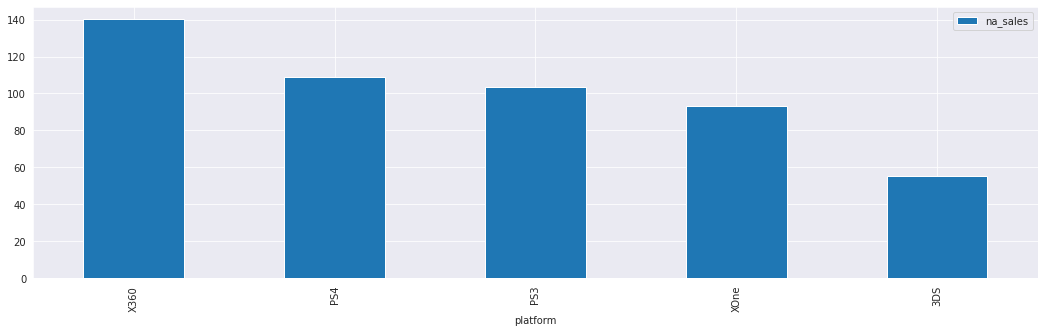

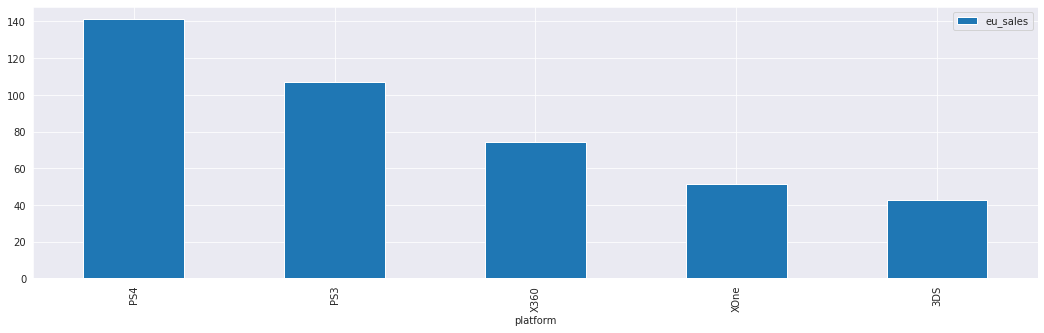

<AxesSubplot:xlabel='platform'>

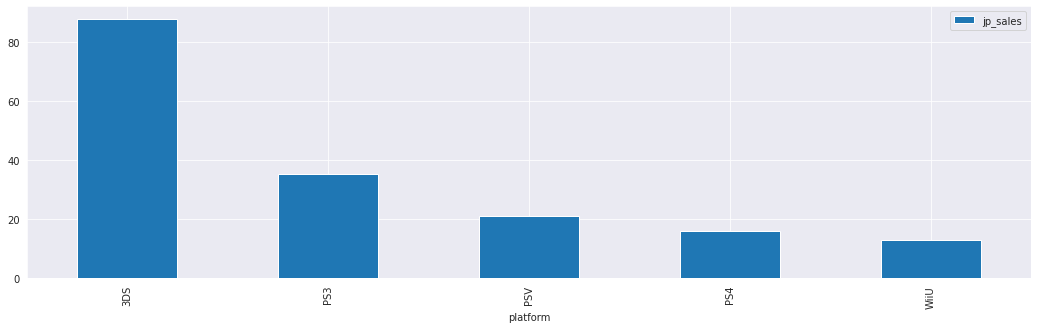

In [34]:
#определим самые популярные платформы для всех регионов
df_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))
plt.show()
df_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))
plt.show()
df_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))

В США самая популярная платформа - X360, в Европе - PS4, в Азии - 3DS.

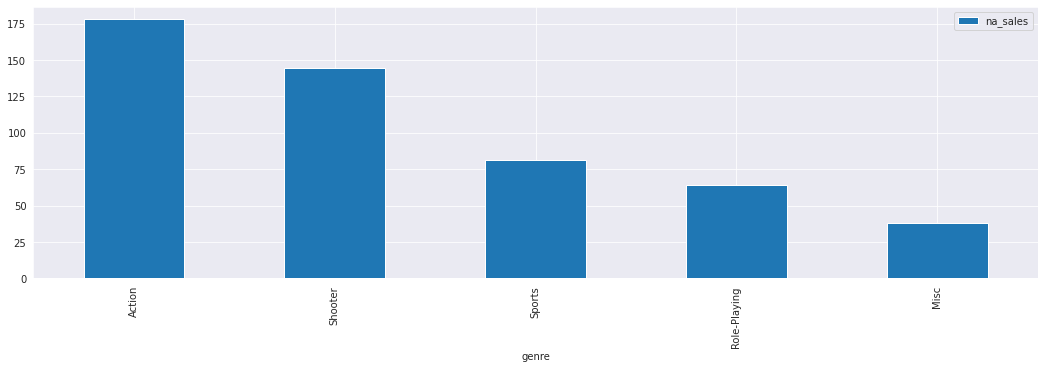

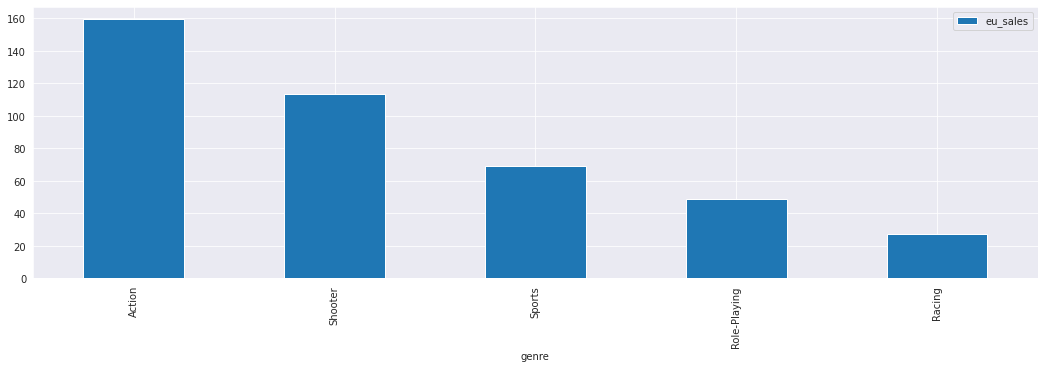

<AxesSubplot:xlabel='genre'>

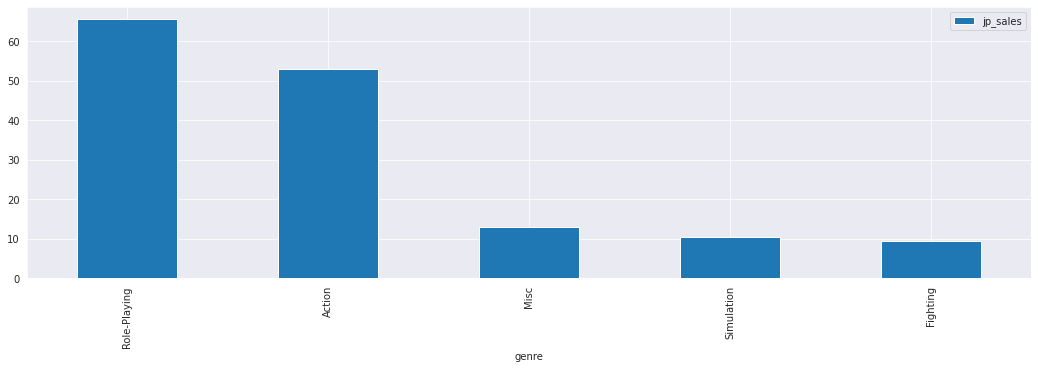

In [35]:
#определим самые популярные жанры для всех регионов
df_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))
plt.show()
df_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))
plt.show()
df_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))

Жанр Action популярен во всех регионах. В Азии на первом месте жанр "Ролевые игры" и отсустсвует популярный в Америке и Европе Shooter.

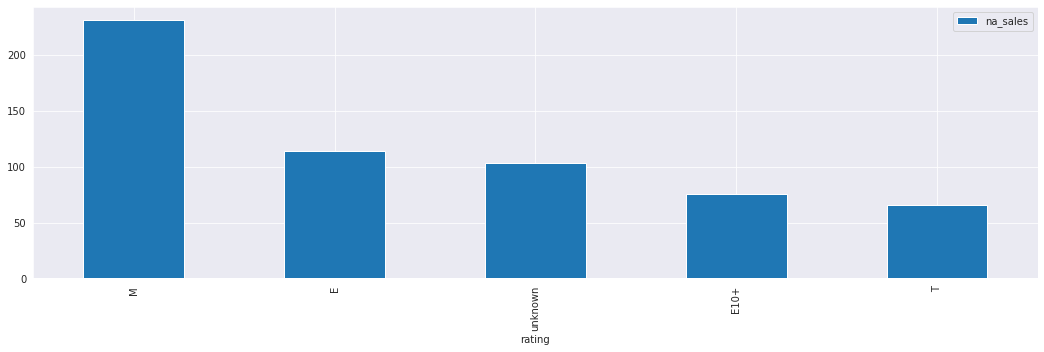

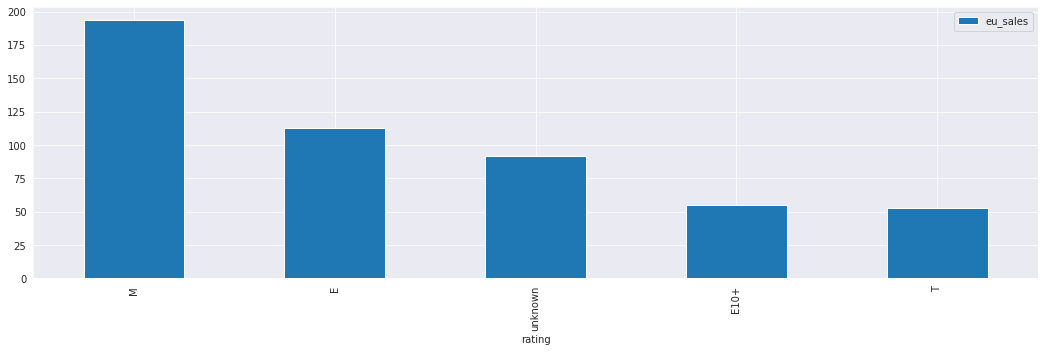

<AxesSubplot:xlabel='rating'>

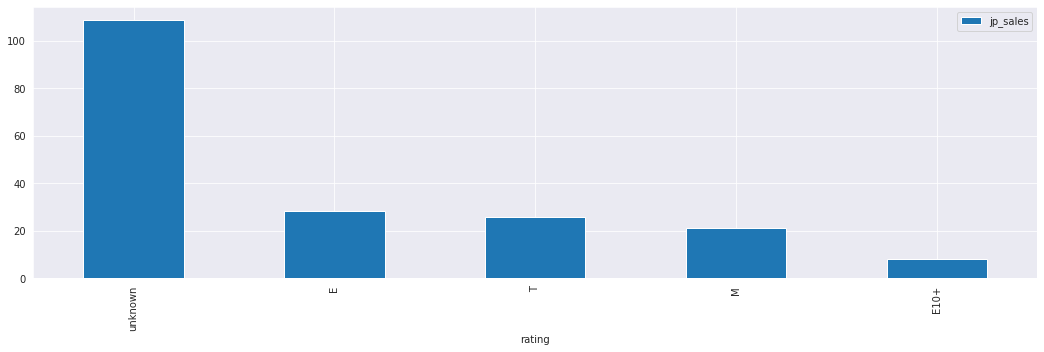

In [36]:
#определим влияние рейтинга ESRB на продажи
df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values('na_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))
plt.show()
df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values('eu_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))
plt.show()
df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values('jp_sales', ascending=False).head(5).plot(kind='bar', figsize=(18, 5))

В Америке и Европе самыми популярными являются игры для взрослых (М).


В Азии у большого количества игр не определен возрастной рейтинг. Возможно, ESRB не сотрудничает с японскими производителями игр

### Вывод

В Америке и Европе портрет пользователя примерно одинаковый: это взрослые люди, которые любят играть в игры жанра Action и Shooter на платформах Xbox и Playstation.

В Азии пользователи предпочитают в жанре Role-Playing и Action на платформе 3DS, о возрастном рейтинге сказать сложно, так как у многих игр его просто нет.

## Проверка гипотез

Проверим гипотезы: 
 - средний пользовательский рейтинг платформ Xbox One и PC одинаковый
 - средний пользовательский рейтинг жанров Action и Sports разный

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

Гипотезы:
- H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковый
- H1: средний пользовательский рейтинг платформ Xbox One и PC различается

In [37]:
XOne = df_actual[(df_actual['platform'] == 'XOne') & (df_actual['user_score'] > 0)]['user_score']
PC = df_actual[(df_actual['platform'] == 'PC') & (df_actual['user_score'] > 0)]['user_score']
print(XOne.var(ddof=1))
print(PC.var(ddof=1))
PC.isna().sum()

1.9069968429360695
2.770443997158418


0

In [38]:
#equal_var установим False, так как дисперсии выборок не равны
alpha = 0.05
results = st.ttest_ind(XOne, PC, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


p-значение больше установленного уровня статистической значимости, значит мы можем предположить, что нулевая гипотеза верна, то есть средний пользовательский рейтинг платформ Xbox One и PC одинаковый

Гипотезы:

- H0: средний пользовательский рейтинг жанров Action и Sports одинаковый
- H1: средний пользовательский рейтинг жанров Action и Sports различается

In [39]:
action = df_actual[(df_actual['genre'] == 'Action') & (df_actual['user_score'] > 0)]['user_score']
sports = df_actual[(df_actual['genre'] == 'Sports') & (df_actual['user_score'] > 0)]['user_score']
print(action.var(ddof=1))
print(sports.var(ddof=1))
action.isna().sum()

1.8890840494348111
3.022890298704732


0

In [40]:
#equal_var установим False, так как дисперсии выборок не равны
results = st.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


p-значение меньше установленного уровня статистической значимости, значит мы можем предположить, что нулевая гипотеза не верна, соответственно средний пользовательский рейтинг жанров Action и Sports различается

### Вывод

Средние пользовательские рейтинги на платформах Xbox One и PC различаются , а рейтинги жанров Action и Sports - близки по значению.

## Общий вывод

- Актуальный период времени для планирования кампании на 2017 год - 2012-2016 годы.
- Жизненный цикл платформ видеоигр составляет около 10 лет, пик популярности в течение 5 лет.
- Перспективными являются платформы: PS4, XOne, 3DS, WiiU, PC, PSV.
- Наиболее популярные жанры игр за последние 5 лет: Action, Shooter и Role-Playing.
- Оценки критиков имеют среднюю корреляцию с суммарными продажами, в отличие от оценок пользователей.
- Портрет пользователя регионов Северная Америка и Европа не сильно различается по предпочтениям, в отличие от региона Японии.
- Средние пользовательские рейтинги на платформах Xbox One и PC одинаковые , а рейтинги жанров Action и Sports - различаются по оценкам.




    
    Рекомендации:
- делать ставку на продажу игр для платформ PS4, XOne, 3DS, WiiU, PC, PSV;
- отдавать преимущество играм жанров Shooter, Sports, Role-Playing, Action;
- учесть особенность азиатского рынка при планировании рекламных кампаний.